In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import random
import re

data = pd.read_csv('./dataset_diabetes/diabetic_data.csv')
print(data.shape)
data.columns

In [6]:
data = data.replace('?', np.nan)

In [ ]:
data['medical']

In [12]:
missing = data.isna().sum()/len(data) * 100

In [16]:
missing

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [18]:
missing[missing > 0]

race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
dtype: float64

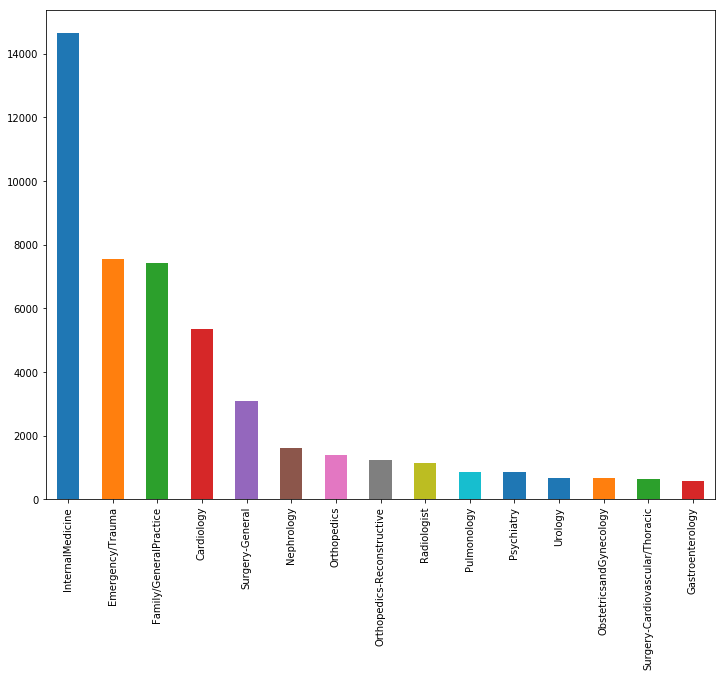

In [21]:
pd.value_counts(data['medical_specialty']).nlargest(15).plot.bar(figsize = (12,9))

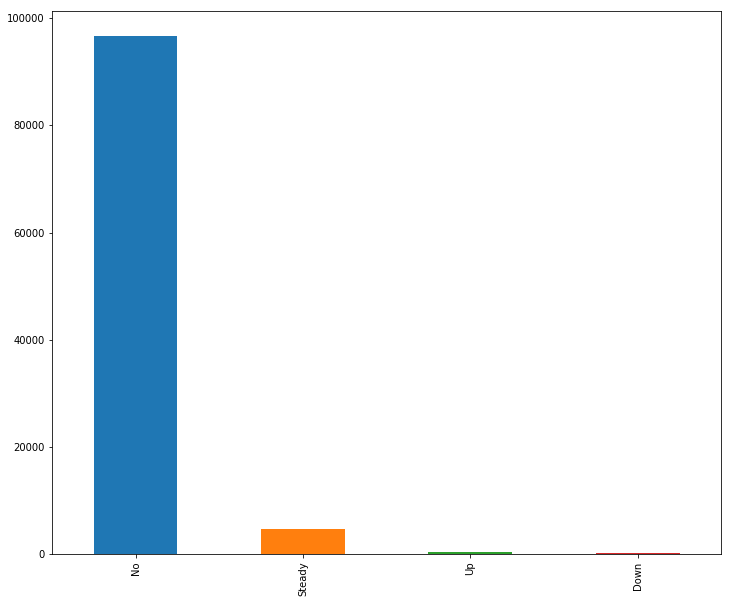

In [25]:
pd.value_counts(data['glimepiride']).nlargest(15).plot.bar(figsize = (12,10))

In [28]:
data['target'] = list(map(lambda x: 0 if x == "NO" else 1 if x == "<30" else 0, data['readmitted']))

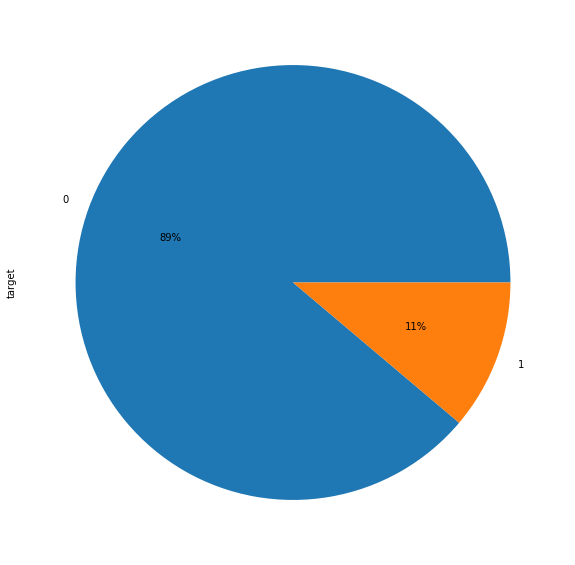

In [30]:
pd.value_counts(data['target']).plot.pie(figsize = (12,10),  autopct='%1.0f%%')

In [31]:
data['target'].value_counts()

0    90409
1    11357
Name: target, dtype: int64